In [182]:
# Importazioni librerie di analisi dati 
import pandas_dq as pdq
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [183]:
# Importazioni librerie per Machine Learning e valutazione modelli
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')

=== CARICAMENTO DEL DATASET ===


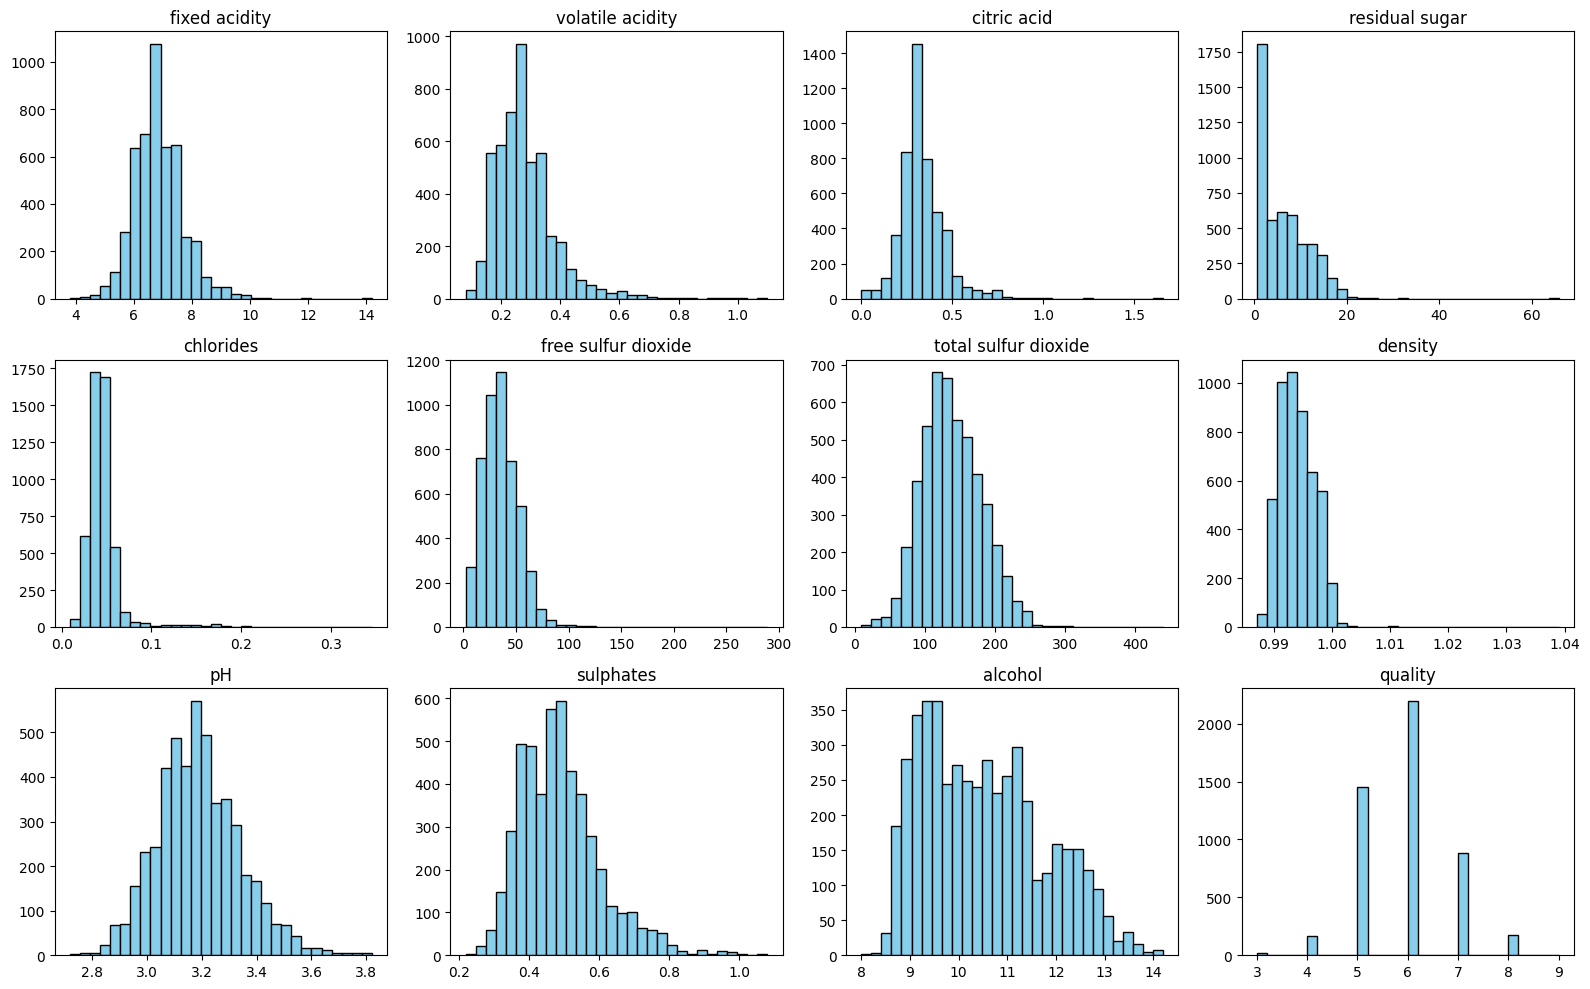

In [184]:
print("=== CARICAMENTO DEL DATASET ===")
path = 'wine_quality/winequality-white.csv'
df = pd.read_csv(path, sep=';')

plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()
plt.savefig('./immagini_progetto/distribuzione_caratteristiche.png')
plt.show()

In [185]:
print("=== ANALISI ESPLORATIVA ===")
print(f"Dimensioni del dataset: {df.shape[0]} campioni per {df.shape[1]} features")

dqr = pdq.dq_report(df, target='quality', verbose=1, html=0, csv_engine='pandas')

dqr.dfi.export('./immagini_progetto/report_qualita_dati.png')

=== ANALISI ESPLORATIVA ===
Dimensioni del dataset: 4898 campioni per 12 features
There are 937 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
fixed acidity,float64,0.000000,NA,3.800000,14.200000,Column has 106 outliers greater than upper bound (8.80) or lower than lower bound(4.80). Cap them or remove them.
volatile acidity,float64,0.000000,NA,0.080000,1.100000,Column has 133 outliers greater than upper bound (0.51) or lower than lower bound(0.03). Cap them or remove them.
citric acid,float64,0.000000,NA,0.000000,1.660000,Column has 223 outliers greater than upper bound (0.57) or lower than lower bound(0.09). Cap them or remove them.
residual sugar,float64,0.000000,NA,0.600000,65.800000,Column has 16 outliers greater than upper bound (19.85) or lower than lower bound(-9.35). Cap them or remove them.
chlorides,float64,0.000000,NA,0.009000,0.346000,Column has 178 outliers greater than upper bound (0.07) or lower than lower bound(0.01). Cap them or remove them.
free sulfur dioxide,float64,0.000000,NA,2.000000,289.000000,Column has 44 outliers greater than upper bound (78.00) or lower than lower bound(-10.00). Cap them or remove them.
total sulfur dioxide,float64,0.000000,NA,9.000000,440.000000,Column has 14 outliers greater than upper bound (256.00) or lower than lower bound(16.00). Cap them or remove them.
density,float64,0.000000,NA,0.987110,1.038980,"Column has 6 outliers greater than upper bound (1.00) or lower than lower bound(0.99). Cap them or remove them., Column has a high correlation with ['residual sugar']. Consider dropping one of them."
pH,float64,0.000000,NA,2.720000,3.820000,Column has 46 outliers greater than upper bound (3.59) or lower than lower bound(2.79). Cap them or remove them.
sulphates,float64,0.000000,NA,0.220000,1.080000,Column has 96 outliers greater than upper bound (0.76) or lower than lower bound(0.20). Cap them or remove them.


In [186]:
print("=== STATISTICHE DESCRITTIVE ===")

print(f"Memoria usata dal dataframe: {df.memory_usage().sum() / (1024):.2f} KB")

describe_df = pd.DataFrame(df.describe(include='all').round(2).T, columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR
Min_Value = df.min().round(2)
Max_Value = df.max().round(2)
Null_values = df.isnull().sum()

describe_df['IQR'] = IQR
describe_df['Lower Bound'] = Lower_Bound
describe_df['Upper Bound'] = Upper_Bound
describe_df['Min Value'] = Min_Value
describe_df['Max Value'] = Max_Value
describe_df['Null Values'] = Null_values

describe_df.dfi.export('./immagini_progetto/statistiche_descrittive.png')
describe_df

=== STATISTICHE DESCRITTIVE ===
Memoria usata dal dataframe: 459.32 KB


,count,mean,std,min,25%,50%,75%,max,IQR,Lower Bound,Upper Bound,Min Value,Max Value,Null Values
fixed acidity,4898.0,6.85,0.84,3.80,6.30,6.80,7.30,14.20,1.000000,4.800000,8.800000,3.80,14.20,0
volatile acidity,4898.0,0.28,0.10,0.08,0.21,0.26,0.32,1.10,0.110000,0.045000,0.485000,0.08,1.10,0
citric acid,4898.0,0.33,0.12,0.00,0.27,0.32,0.39,1.66,0.120000,0.090000,0.570000,0.00,1.66,0
residual sugar,4898.0,6.39,5.07,0.60,1.70,5.20,9.90,65.80,8.200000,-10.600000,22.200000,0.60,65.80,0
chlorides,4898.0,0.05,0.02,0.01,0.04,0.04,0.05,0.35,0.014000,0.015000,0.071000,0.01,0.35,0
free sulfur dioxide,4898.0,35.31,17.01,2.00,23.00,34.00,46.00,289.00,23.000000,-11.500000,80.500000,2.00,289.00,0
total sulfur dioxide,4898.0,138.36,42.50,9.00,108.00,134.00,167.00,440.00,59.000000,19.500000,255.500000,9.00,440.00,0
density,4898.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04,0.004377,0.985156,1.002666,0.99,1.04,0
pH,4898.0,3.19,0.15,2.72,3.09,3.18,3.28,3.82,0.190000,2.805000,3.565000,2.72,3.82,0
sulphates,4898.0,0.49,0.11,0.22,0.41,0.47,0.55,1.08,0.140000,0.200000,0.760000,0.22,1.08,0


In [187]:
import json

Q1_dict = {f"{col}": float(df[col].quantile(0.25)) for col in df.columns}
Q3_dict = {f"{col}": float(df[col].quantile(0.75)) for col in df.columns}
IQR_dict = {f"{col}": float(Q3_dict[col] - Q1_dict[col]) for col in df.columns}

Quartile_dict = {"Q1" : Q1_dict, "Q3" : Q3_dict, "IQR": IQR_dict}
Quartile_json = json.dumps(Quartile_dict, indent=4)

print(Quartile_json)

{
    "Q1": {
        "fixed acidity": 6.3,
        "volatile acidity": 0.21,
        "citric acid": 0.27,
        "residual sugar": 1.7,
        "chlorides": 0.036,
        "free sulfur dioxide": 23.0,
        "total sulfur dioxide": 108.0,
        "density": 0.9917225000000001,
        "pH": 3.09,
        "sulphates": 0.41,
        "alcohol": 9.5,
        "quality": 5.0
    },
    "Q3": {
        "fixed acidity": 7.3,
        "volatile acidity": 0.32,
        "citric acid": 0.39,
        "residual sugar": 9.9,
        "chlorides": 0.05,
        "free sulfur dioxide": 46.0,
        "total sulfur dioxide": 167.0,
        "density": 0.9961,
        "pH": 3.28,
        "sulphates": 0.55,
        "alcohol": 11.4,
        "quality": 6.0
    },
    "IQR": {
        "fixed acidity": 1.0,
        "volatile acidity": 0.11000000000000001,
        "citric acid": 0.12,
        "residual sugar": 8.200000000000001,
        "chlorides": 0.014000000000000005,
        "free sulfur dioxide": 23.0,
    

In [188]:
outliers_df = pd.DataFrame()
df_copy = df.copy().drop(columns=['quality'])

num_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist() # Get numerical columns
if len(num_cols) > 0:
    outlier_cols = []
    for col in num_cols:
        q1 = df_copy[col].quantile(0.25) # Get the first quartile
        q3 = df_copy[col].quantile(0.75) # Get the third quartile
        iqr = q3 - q1 # Get the interquartile range
        lower_bound = q1 - 1.5 * iqr # Get the lower bound
        upper_bound = q3 + 1.5 * iqr # Get the upper bound
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col] # Get the outliers
        if not outliers.empty:
            temp = pd.DataFrame(outliers)
            temp.columns = [col]
            outliers_df = pd.concat([outliers_df, temp], axis=1)
            outliers_df.fillna(0, inplace=True)

outliers_df["outlier_count"] = (outliers_df != 0).sum(axis=1)

print(outliers_df["outlier_count"].value_counts())
outliers_df

outlier_count
1    727
2    136
3      8
0      7
4      4
5      1
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,outlier_count
98,9.8,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
169,9.8,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
207,10.2,0.00,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2
294,9.1,0.59,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2
358,10.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
4696,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.96,1
4753,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.77,1
4818,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.95,1
4886,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.08,1


In [189]:
idx_outliers = [i for i in outliers_df.index]
idx_outliers, len(idx_outliers)

([98,
  169,
  207,
  294,
  358,
  551,
  555,
  656,
  774,
  847,
  873,
  1053,
  1109,
  1123,
  1124,
  1138,
  1139,
  1141,
  1142,
  1146,
  1147,
  1178,
  1205,
  1210,
  1214,
  1228,
  1239,
  1263,
  1300,
  1307,
  1308,
  1309,
  1312,
  1313,
  1334,
  1349,
  1372,
  1373,
  1404,
  1420,
  1423,
  1505,
  1526,
  1536,
  1544,
  1561,
  1564,
  1580,
  1581,
  1586,
  1621,
  1624,
  1626,
  1627,
  1690,
  1718,
  1730,
  1758,
  1790,
  1801,
  1856,
  1857,
  1858,
  1900,
  1930,
  1932,
  1936,
  1951,
  1961,
  2014,
  2017,
  2028,
  2030,
  2050,
  2083,
  2127,
  2154,
  2162,
  2191,
  2206,
  2250,
  2266,
  2308,
  2312,
  2321,
  2357,
  2378,
  2400,
  2401,
  2404,
  2535,
  2540,
  2541,
  2542,
  2607,
  2625,
  2639,
  2668,
  2872,
  3094,
  3095,
  3220,
  3265,
  3307,
  3410,
  3414,
  3526,
  3710,
  3915,
  4259,
  4446,
  4470,
  4518,
  4522,
  4679,
  4786,
  4787,
  4792,
  4847,
  17,
  20,
  23,
  79,
  147,
  178,
  188,
  202,
  208,
 

In [190]:
def quality_to_label(quality):
    if quality in range(0, 5):
        return 'low'
    elif quality in range(5, 8):
        return 'medium'
    else:
        return 'high'

In [191]:
print("\nDistribuzione della variabile target 'quality':")

quality_df = pd.DataFrame(df['quality'].value_counts().sort_index()).reset_index()
quality_df.columns = ['quality', 'count']

for idx, entry in quality_df.iterrows():
    quality_df.at[idx, 'class'] = quality_to_label(entry['quality'])

quality_df.dfi.export('./immagini_progetto/distribuzione_variabile_target.png')
quality_df


Distribuzione della variabile target 'quality':


,quality,count,class
0,3,20,low
1,4,163,low
2,5,1457,medium
3,6,2198,medium
4,7,880,medium
5,8,175,high
6,9,5,high


# MODELLO 1: DATI GREZZI (SENZA PREPROCESSING)

Questo modello utilizza i dati direttamente dal dataset, senza alcun preprocessing, pulizia o trasformazione.

In [192]:
# Usiamo i dati così come sono, senza alcun preprocessing
X_raw = df.drop(['quality'], axis=1) # Features
X_raw_df = pd.DataFrame(X_raw.describe(include='all').round(2)).T
X_raw_df.dfi.export('./immagini_progetto/statistiche_descrittive_features_raw.png')
X_raw_df

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.85,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4898.0,0.28,0.10,0.08,0.21,0.26,0.32,1.10
citric acid,4898.0,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4898.0,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4898.0,0.05,0.02,0.01,0.04,0.04,0.05,0.35
free sulfur dioxide,4898.0,35.31,17.01,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4898.0,138.36,42.50,9.00,108.00,134.00,167.00,440.00
density,4898.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4898.0,3.19,0.15,2.72,3.09,3.18,3.28,3.82
sulphates,4898.0,0.49,0.11,0.22,0.41,0.47,0.55,1.08


In [193]:
y_raw = df['quality'] # Target
pd.DataFrame(y_raw)

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [194]:
y_raw_df = pd.DataFrame(y_raw.describe(include='all').round(2)).T
y_raw_df.dfi.export('./immagini_progetto/statistiche_descrittive_target_raw.png')
y_raw_df

,count,mean,std,min,25%,50%,75%,max
quality,4898.0,5.88,0.89,3.0,5.0,6.0,6.0,9.0


In [195]:
y_raw_copy = pd.DataFrame(y_raw.copy().apply(quality_to_label))
y_raw_copy

,quality
0,medium
1,medium
2,medium
3,medium
4,medium
...,...
4893,medium
4894,medium
4895,medium
4896,medium


In [196]:
print(f"Features shape: {", ".join(str(dim) for dim in X_raw.shape)}")
print(f"Target shape: {y_raw.shape[0]}")

Features shape: 4898, 11
Target shape: 4898


In [197]:
# Divisione train/test per il modello grezzo
X_train_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)[0] # Features di training
X_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)[1] # Features di test
y_train_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)[2] # Target di training
y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)[3] # Target di test

print(f"Training set: {X_train_raw.shape[0]} campioni per {X_train_raw.shape[1]} features")
print(f"Test set: {X_test_raw.shape[0]} campioni per {X_test_raw.shape[1]} features")

print(f"Training set: {X_train_raw.shape[0]} campioni, {y_train_raw.shape[0]} target")
print(f"Test set: {X_test_raw.shape[0]} campioni, {y_test_raw.shape[0]} target")

Training set: 3918 campioni per 11 features
Test set: 980 campioni per 11 features
Training set: 3918 campioni, 3918 target
Test set: 980 campioni, 980 target


In [198]:
# Verifica se ci sono valori mancanti nei dati grezzi
print(f"\nValori mancanti nel training set: {X_train_raw.isnull().sum().sum()}")
print(f"Valori mancanti nel test set: {X_test_raw.isnull().sum().sum()}")


Valori mancanti nel training set: 0
Valori mancanti nel test set: 0


In [199]:
print("=== ADDESTRAMENTO MODELLO 1.1 (DATI GREZZI E RANDOM FOREST CLASSIFIER) ===")

# Creiamo un Random Forest Classifier per i dati grezzi
model_raw_rf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1, class_weight='balanced')

model_raw_rf

=== ADDESTRAMENTO MODELLO 1.1 (DATI GREZZI E RANDOM FOREST CLASSIFIER) ===


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [200]:
# Addestramento del modello
print("Addestramento in corso...")
model_raw_rf.fit(X_train_raw, y_train_raw)

Addestramento in corso...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [201]:
# Predizione
y_pred_raw_rf = model_raw_rf.predict(X_test_raw)
predict_value_rf = {
    "0": 0,
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0,
    "7": 0,
    "8": 0,
    "9": 0,
}

for value in y_pred_raw_rf:
    predict_value_rf[str(value)] += 1


len(y_pred_raw_rf), predict_value_rf

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


(980,
 {'0': 0,
  '1': 0,
  '2': 0,
  '3': 0,
  '4': 8,
  '5': 279,
  '6': 538,
  '7': 138,
  '8': 17,
  '9': 0})

In [202]:
# Valutazione
accuracy_raw_rf = accuracy_score(y_test_raw, y_pred_raw_rf)
print(f"Accuracy del modello RFC con dati grezzi: {accuracy_raw_rf:.4f}")

Accuracy del modello RFC con dati grezzi: 0.7122


In [203]:
print("\nReport di classificazione (dati grezzi RFC):")
print(classification_report(y_test_raw, y_pred_raw_rf))


Report di classificazione (dati grezzi RFC):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.75      0.24      0.36        25
           5       0.75      0.72      0.73       291
           6       0.66      0.82      0.73       432
           7       0.80      0.58      0.67       192
           8       0.94      0.46      0.62        35

    accuracy                           0.71       980
   macro avg       0.65      0.47      0.52       980
weighted avg       0.72      0.71      0.70       980



In [204]:
print("=== ADDESTRAMENTO MODELLO 1.2 (DATI GREZZI E GRADIENT BOOSTING CLASSIFIER) ===")

model_raw_gb = GradientBoostingClassifier(n_estimators=100, random_state=42, verbose=1)

model_raw_gb

=== ADDESTRAMENTO MODELLO 1.2 (DATI GREZZI E GRADIENT BOOSTING CLASSIFIER) ===


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [205]:
print("Addestramento in corso...")
model_raw_gb.fit(X_train_raw, y_train_raw)

Addestramento in corso...
      Iter       Train Loss   Remaining Time 
         1           1.2378            4.25s
         2           1.1893            4.15s
         3           1.1497            4.02s
         4           1.1224            3.95s
         5           1.1023            3.90s
         6           1.0846            3.76s
         7           1.0691            3.71s
         8           1.0557            3.64s
         9           1.0416            3.62s
        10           1.0309            3.55s
        20           0.9462            3.03s
        30           0.8912            2.60s
        40           0.8531            2.19s
        50           0.8193            1.80s
        60           0.7910            1.45s
        70           0.7692            1.08s
        80           0.7462            0.71s
        90           0.7252            0.35s
       100           0.7053            0.00s


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [206]:
y_pred_raw_gb = model_raw_gb.predict(X_test_raw)

predict_value_gb = {
    "0": 0,
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0,
    "7": 0,
    "8": 0,
    "9": 0,
}

for value in y_pred_raw_gb:
    predict_value_gb[str(value)] += 1
    
len(y_pred_raw_gb), predict_value_gb

(980,
 {'0': 0,
  '1': 0,
  '2': 0,
  '3': 3,
  '4': 14,
  '5': 269,
  '6': 567,
  '7': 113,
  '8': 14,
  '9': 0})

In [207]:
accuracy_raw_gb = accuracy_score(y_test_raw, y_pred_raw_gb)
print(f"Accuracy del modello GBC con dati grezzi: {accuracy_raw_gb:.4f}")

Accuracy del modello GBC con dati grezzi: 0.5745


In [208]:
print("\nReport di classificazione (dati grezzi GBC):")
print(classification_report(y_test_raw, y_pred_raw_gb))


Report di classificazione (dati grezzi GBC):
              precision    recall  f1-score   support

           3       0.33      0.20      0.25         5
           4       0.57      0.32      0.41        25
           5       0.60      0.56      0.58       291
           6       0.56      0.73      0.63       432
           7       0.60      0.35      0.45       192
           8       0.57      0.23      0.33        35

    accuracy                           0.57       980
   macro avg       0.54      0.40      0.44       980
weighted avg       0.58      0.57      0.56       980



# MODELLO 2: DATI PREPROCESSATI

Questo modello utilizza tecniche di preprocessing come:
- Standardizzazione delle features
- Gestione degli outliers
- Bilanciamento delle classi
<!-- - Feature engineering -->

In [209]:
print("=== MODELLO 2: PREPROCESSING AVANZATO ===")

df_processed = df.copy().drop(columns=['quality'])
dqr_rf = pdq.dq_report(df_processed, verbose=1, html=0, csv_engine='pandas')

=== MODELLO 2: PREPROCESSING AVANZATO ===
There are 937 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
fixed acidity,float64,0.000000,NA,3.800000,14.200000,Column has 106 outliers greater than upper bound (8.80) or lower than lower bound(4.80). Cap them or remove them.
volatile acidity,float64,0.000000,NA,0.080000,1.100000,Column has 133 outliers greater than upper bound (0.51) or lower than lower bound(0.03). Cap them or remove them.
citric acid,float64,0.000000,NA,0.000000,1.660000,Column has 223 outliers greater than upper bound (0.57) or lower than lower bound(0.09). Cap them or remove them.
residual sugar,float64,0.000000,NA,0.600000,65.800000,Column has 16 outliers greater than upper bound (19.85) or lower than lower bound(-9.35). Cap them or remove them.
chlorides,float64,0.000000,NA,0.009000,0.346000,Column has 178 outliers greater than upper bound (0.07) or lower than lower bound(0.01). Cap them or remove them.
free sulfur dioxide,float64,0.000000,NA,2.000000,289.000000,Column has 44 outliers greater than upper bound (78.00) or lower than lower bound(-10.00). Cap them or remove them.
total sulfur dioxide,float64,0.000000,NA,9.000000,440.000000,Column has 14 outliers greater than upper bound (256.00) or lower than lower bound(16.00). Cap them or remove them.
density,float64,0.000000,NA,0.987110,1.038980,"Column has 6 outliers greater than upper bound (1.00) or lower than lower bound(0.99). Cap them or remove them., Column has a high correlation with ['residual sugar']. Consider dropping one of them."
pH,float64,0.000000,NA,2.720000,3.820000,Column has 46 outliers greater than upper bound (3.59) or lower than lower bound(2.79). Cap them or remove them.
sulphates,float64,0.000000,NA,0.220000,1.080000,Column has 96 outliers greater than upper bound (0.76) or lower than lower bound(0.20). Cap them or remove them.


## Correzione outliers

Utilizzando la libreria pandas_dq, abbiamo identificato 862 outliers.

Durante un preprocessing dei dati manuali abbiamo identificato 883 outliers.

Utilizzeremo come dati per l'addestramento e il confronto finale quelli analizzati manualmente, seguendo il report della libreria come guida degli errori.

In [210]:
df_rf_processed = df_processed.copy().drop(outliers_df.index)

print(f"Dataset dopo la rimozione degli outliers: {df_rf_processed.shape[0]} campioni per {df_rf_processed.shape[1]} features")

df_rf_processed

Dataset dopo la rimozione degli outliers: 4015 campioni per 11 features


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [211]:
X_rf_processed = df_rf_processed # Features
y_rf_processed = df['quality'].copy().drop(index=idx_outliers) # Target

print(f"\nFeatures preprocessate: {X_rf_processed.shape[0]} campioni per {X_rf_processed.shape[1]} features")
print(f"Target preprocessato: {y_rf_processed.shape[0]}")


Features preprocessate: 4015 campioni per 11 features
Target preprocessato: 4015


In [212]:
print("=== MODELLO 2: DIVISIONE E STANDARDIZZAZIONE===")
X_train_processed = train_test_split(X_rf_processed, y_rf_processed, test_size=0.2, random_state=42)[0] # Features di training
X_test_processed = train_test_split(X_rf_processed, y_rf_processed, test_size=0.2, random_state=42)[1] # Features di test
y_train_processed = train_test_split(X_rf_processed, y_rf_processed, test_size=0.2, random_state=42)[2] # Target di training
y_test_processed = train_test_split(X_rf_processed, y_rf_processed, test_size=0.2, random_state=42)[3] # Target di test

print(f"Training set: {X_train_processed.shape[0]} campioni per {X_train_processed.shape[1]} features")
print(f"Test set: {X_test_processed.shape[0]} campioni per {X_test_processed.shape[1]} features")
print(f"Training set: {X_train_processed.shape[0]} campioni, {y_train_processed.shape[0]} target")
print(f"Test set: {X_test_processed.shape[0]} campioni, {y_test_processed.shape[0]} target")

=== MODELLO 2: DIVISIONE E STANDARDIZZAZIONE===
Training set: 3212 campioni per 11 features
Test set: 803 campioni per 11 features
Training set: 3212 campioni, 3212 target
Test set: 803 campioni, 803 target


In [213]:
scaler = StandardScaler()
X_train_processed_scaled = scaler.fit_transform(X_train_processed)
X_test_processed_scaled = scaler.transform(X_test_processed)

X_train_processed_scaled = pd.DataFrame(X_train_processed_scaled, columns=X_train_processed.columns)
X_test_processed_scaled = pd.DataFrame(X_test_processed_scaled, columns=X_test_processed.columns)

X_train_processed_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.285541,-0.185902,-0.985352,-0.955154,0.578121,-0.569570,-0.301940,0.114827,1.322095,1.193529,-0.398608
1,-0.830374,-0.581693,-0.517925,-0.853977,-0.221244,-0.704149,-0.277730,-0.746586,0.019777,-0.017692,-0.068737
2,0.123084,-1.241345,-0.284211,-0.894447,0.478200,-1.444330,-0.471410,-0.808608,-0.197276,0.285113,0.838409
3,-0.013125,0.737611,0.066360,-1.157508,-1.520212,-1.309752,-1.706124,-1.366804,-0.559031,-1.733588,1.003344
4,0.259292,-1.637136,1.001214,-1.117037,-0.521006,-0.838727,-1.004032,-0.849956,0.453883,-0.522367,0.261134
...,...,...,...,...,...,...,...,...,...,...,...
3207,-0.966583,-0.185902,1.936069,0.238736,0.977803,2.189288,2.167487,0.597219,-0.197276,-0.118627,-1.388222
3208,0.259292,1.133402,-0.284211,0.016147,-1.420291,-0.502281,-1.197713,-0.091912,1.539148,-0.623302,0.673473
3209,0.940333,0.209889,0.066360,0.258972,0.578121,0.507057,1.053824,1.217436,1.322095,1.092594,-0.398608
3210,-1.238999,-0.185902,-0.985352,0.198266,0.178439,-0.906016,-0.568251,0.259545,1.394446,0.991659,-0.068737


In [214]:
X_test_processed_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.557958,-0.185902,0.066360,-1.015860,-0.221244,0.507057,-0.519831,-1.125608,0.019777,-0.017692,0.591006
1,2.302416,-1.505206,1.936069,-0.995625,-1.120529,-1.175173,-0.350360,-0.229738,-1.137838,-0.825172,-0.233672
2,-0.421750,0.209889,0.183216,-0.570681,-0.221244,-0.367703,-0.374570,-0.949880,0.670936,-0.017692,1.250748
3,1.348958,2.386741,2.754067,-1.096802,-0.221244,-1.780776,-1.270343,-0.022999,0.453883,-0.522367,0.178667
4,0.395500,-0.185902,-0.167354,-0.833741,0.777962,-0.165835,0.472782,-0.849956,-0.341978,0.285113,0.673473
...,...,...,...,...,...,...,...,...,...,...,...
798,-2.464874,0.077959,-0.050497,-0.388562,-1.020609,1.583685,1.005404,-1.483956,1.900902,-1.733588,1.663087
799,0.804125,0.869541,-0.751638,1.857570,0.678042,2.189288,1.780126,1.792861,-0.920786,2.001010,-0.893415
800,-1.511416,0.737611,-1.686493,-1.015860,-1.320371,-0.569570,-0.786141,-1.125608,1.828551,-1.127978,0.343602
801,-1.102791,0.341820,-0.868495,-1.015860,-0.920688,-0.300413,-0.544041,-2.042152,-0.776084,-0.522367,2.157894


In [215]:
print("Standardizzazione completata!")
print(f"Media delle features nel training set dopo standardizzazione: {X_train_processed_scaled.mean().mean():.6f}")
print(f"Deviazione standard delle features nel training set: {X_train_processed_scaled.std().mean():.6f}")

Standardizzazione completata!
Media delle features nel training set dopo standardizzazione: 0.000000
Deviazione standard delle features nel training set: 1.000156


In [216]:
from matplotlib.pyplot import cla


print("=== ADDESTRAMENTO MODELLO 2.1 RANDOM FOREST ===")
model_rf_processed = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1, class_weight='balanced')
model_rf_processed

=== ADDESTRAMENTO MODELLO 2.1 RANDOM FOREST ===


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [217]:
print("Addestramento in corso...")
model_rf_processed.fit(X_train_processed_scaled, y_train_processed)

Addestramento in corso...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [218]:
y_pred_rf_processed = model_rf_processed.predict(X_test_processed_scaled)
predict_value_rf_processed = {
    "0": 0,
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0,
    "7": 0,
    "8": 0,
    "9": 0,
}

for value in y_pred_rf_processed:
    predict_value_rf_processed[str(value)] += 1

len(y_pred_rf_processed), predict_value_rf_processed

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


(803,
 {'0': 0,
  '1': 0,
  '2': 0,
  '3': 0,
  '4': 5,
  '5': 196,
  '6': 473,
  '7': 118,
  '8': 11,
  '9': 0})

In [219]:
accuracy_rf_processed = accuracy_score(y_test_processed, y_pred_rf_processed)
print(f"Accuracy del modello RFC con dati preprocessati: {accuracy_rf_processed:.4f}")

Accuracy del modello RFC con dati preprocessati: 0.6812


In [220]:
print("Report di classificazione (dati preprocessati RFC):")
print(classification_report(y_test_processed, y_pred_rf_processed))

Report di classificazione (dati preprocessati RFC):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.60      0.19      0.29        16
           5       0.71      0.63      0.67       219
           6       0.66      0.82      0.73       381
           7       0.70      0.53      0.60       157
           8       1.00      0.39      0.56        28

    accuracy                           0.68       803
   macro avg       0.61      0.43      0.48       803
weighted avg       0.69      0.68      0.67       803



In [221]:
print("=== ADDESTRAMENTO MODELLO 2.2 GRADIENT BOOSTING ===")
model_gb_processed = GradientBoostingClassifier(n_estimators=100, random_state=42, verbose=1)
model_gb_processed

=== ADDESTRAMENTO MODELLO 2.2 GRADIENT BOOSTING ===


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [222]:
print("Addestramento in corso...")
model_gb_processed.fit(X_train_processed_scaled, y_train_processed)

Addestramento in corso...
      Iter       Train Loss   Remaining Time 
         1           1.2072            3.11s
         2           1.1584            3.11s
         3           1.1286            3.12s
         4           1.1046            3.08s
         5           1.0822            3.03s
         6           1.0649            2.98s
         7           1.0485            2.92s
         8           1.0355            2.87s
         9           1.0235            2.86s
        10           1.0126            2.87s
        20           0.9249            2.57s
        30           0.8617            2.19s
        40           0.8224            1.88s
        50           0.7909            1.58s
        60           0.7623            1.27s
        70           0.7363            0.95s
        80           0.7111            0.63s
        90           0.6876            0.32s
       100           0.6659            0.00s


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [223]:
y_pred_gb_processed = model_gb_processed.predict(X_test_processed_scaled)
predict_value_gb_processed = {
    "0": 0,
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0,
    "7": 0,
    "8": 0,
    "9": 0,
}

for value in y_pred_gb_processed:
    predict_value_gb_processed[str(value)] += 1

len(y_pred_gb_processed), predict_value_gb_processed

(803,
 {'0': 0,
  '1': 0,
  '2': 0,
  '3': 2,
  '4': 6,
  '5': 199,
  '6': 480,
  '7': 107,
  '8': 9,
  '9': 0})

In [224]:
accuracy_gb_processed = accuracy_score(y_test_processed, y_pred_gb_processed)
print(f"Accuracy del modello GBC con dati preprocessati: {accuracy_gb_processed:.4f}")

Accuracy del modello GBC con dati preprocessati: 0.6276


# CONFRONTO FINALE TRA I DUE MODELLI

In [225]:
print("=== CONFRONTO FINALE TRA I MODELLI ===")
print("RISULTATI:")

print(f"Modello 1.1 (RFC con dati grezzi) - Accuracy: {accuracy_raw_rf:.4f} ({accuracy_raw_rf*100:.2f}%)")
print(f"Modello 1.2 (GBC con dati grezzi) - Accuracy: {accuracy_raw_gb:.4f} ({accuracy_raw_gb*100:.2f}%)")
print(f"Modello 2.1 (RFC con dati preprocessati) - Accuracy: {accuracy_gb_processed:.4f} ({accuracy_gb_processed*100:.2f}%)")
print(f"Modello 2.2 (GBC con dati preprocessati) - Accuracy: {accuracy_gb_processed:.4f} ({accuracy_gb_processed*100:.2f}%)")

improvement_rf = ((accuracy_rf_processed - accuracy_raw_rf)/accuracy_raw_rf) * 100
improvement_gb = ((accuracy_gb_processed - accuracy_raw_gb)/accuracy_raw_gb) * 100
print(f"\nMiglioramento percentuale del modello RFC dopo il preprocessing: {improvement_rf:.2f}%")
print(f"Miglioramento percentuale del modello GBC dopo il preprocessing: {improvement_gb:.2f}%")

print(f"\nDETTAGLI TECNICI:")
print(f"   • Dataset originale: {df.shape[0]} campioni")
print(f"   • Dataset dopo preprocessing: {df_rf_processed.shape[0]} campioni")
print(f"   • Outliers rimossi: {df.shape[0] - df_rf_processed.shape[0]} campioni")
print(f"   • Features originali: {X_raw.shape[1]}")

print("\nCONCLUSIONI:")
print(f"""   
    Il preprocessing dei dati ha portato ad un miglioramento delle 
    performance del modello a gradient boosting, con un incremento 
    dell'accuratezza del {improvement_gb:.2f}% rispetto al modello 
    originale.
    Tuttavia, il modello random forest ha mostrato un leggero calo 
    delle performance dopo il preprocessing, con una diminuzione 
    dell'accuratezza del {abs(improvement_rf):.2f}%.
      """)

=== CONFRONTO FINALE TRA I MODELLI ===
RISULTATI:
Modello 1.1 (RFC con dati grezzi) - Accuracy: 0.7122 (71.22%)
Modello 1.2 (GBC con dati grezzi) - Accuracy: 0.5745 (57.45%)
Modello 2.1 (RFC con dati preprocessati) - Accuracy: 0.6276 (62.76%)
Modello 2.2 (GBC con dati preprocessati) - Accuracy: 0.6276 (62.76%)

Miglioramento percentuale del modello RFC dopo il preprocessing: -4.36%
Miglioramento percentuale del modello GBC dopo il preprocessing: 9.25%

DETTAGLI TECNICI:
   • Dataset originale: 4898 campioni
   • Dataset dopo preprocessing: 4015 campioni
   • Outliers rimossi: 883 campioni
   • Features originali: 11

CONCLUSIONI:
   
    Il preprocessing dei dati ha portato ad un miglioramento delle 
    performance del modello a gradient boosting, con un incremento 
    dell'accuratezza del 9.25% rispetto al modello 
    originale.
    Tuttavia, il modello random forest ha mostrato un leggero calo 
    delle performance dopo il preprocessing, con una diminuzione 
    dell'accuratezza 

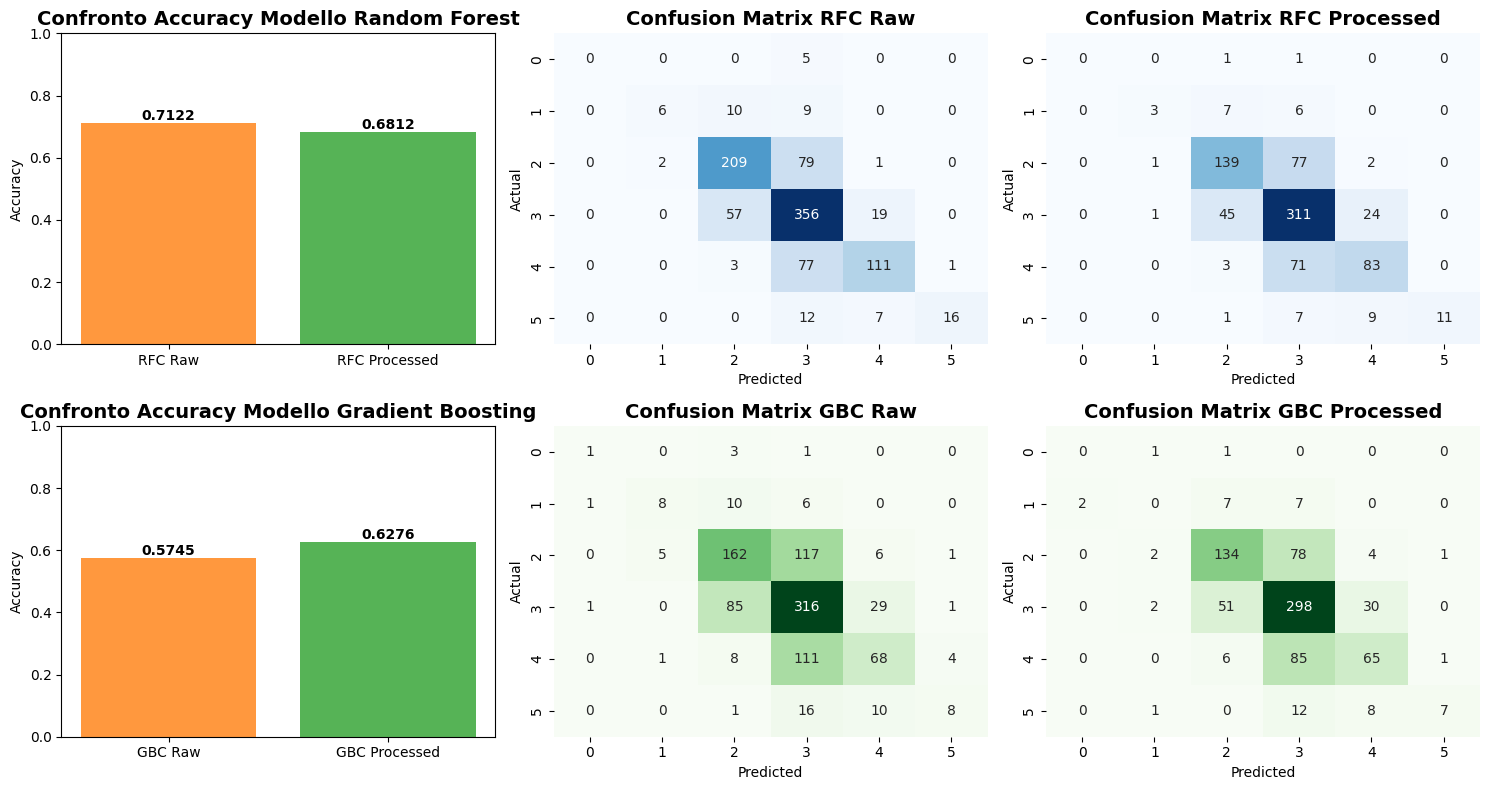

In [226]:
plt.figure(figsize=(15, 8))
colors = ['#ff7f0e', '#2ca02c']

plt.subplot(2, 3, 1)
rf_models = ['RFC Raw', 'RFC Processed']
accuracies_rf = [accuracy_raw_rf, accuracy_rf_processed]
bars = plt.bar(rf_models, accuracies_rf, color=colors, alpha=0.8)

plt.title('Confronto Accuracy Modello Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f"{accuracies_rf[i]:.4f}", ha='center', va='bottom', fontweight='bold')

plt.subplot(2, 3, 4)
gb_models = ['GBC Raw', 'GBC Processed']
accuracies_gb = [accuracy_raw_gb, accuracy_gb_processed]
bars = plt.bar(gb_models, accuracies_gb, color=colors, alpha=0.8)

plt.title('Confronto Accuracy Modello Gradient Boosting', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f"{accuracies_gb[i]:.4f}", ha='center', va='bottom', fontweight='bold')
    
plt.subplot(2, 3, 2)
cm_rf_raw = confusion_matrix(y_test_raw, y_pred_raw_rf)
sns.heatmap(cm_rf_raw, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix RFC Raw', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 3, 3)
cm_rf_processed = confusion_matrix(y_test_processed, y_pred_rf_processed)
sns.heatmap(cm_rf_processed, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix RFC Processed', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 3, 5)
cm_gb_raw = confusion_matrix(y_test_raw, y_pred_raw_gb)
sns.heatmap(cm_gb_raw, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix GBC Raw', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(2, 3, 6)
cm_gb_processed = confusion_matrix(y_test_processed, y_pred_gb_processed)
sns.heatmap(cm_gb_processed, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix GBC Processed', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('./immagini_progetto/confronto_modelli.png')
plt.show()